# Анализ базы данных сервиса для чтения книг

Имеется стартап, который создает приложение для тех, кто любит читать. В распоряжении имеется база данных сервиса для чтения книг. В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. 

**Задача**: Cформулировать ценностное предложение для нового продукта.

Для выполнения задачи ответим на следующие вопросы:  
•	Посчитаем, сколько книг вышло после 1 января 2000 года;  
•	Для каждой книги посчитаем количество обзоров и среднюю оценку;  
•	Определим издательство, которое выпустило наибольшее число книг толще 50 страниц;  
•	Определим автора с самой высокой средней оценкой книг;  
•	Посчитам среднее количество обзоров от пользователей, которые поставили больше 48 оценок.  

База данных содержит следующую структуру.

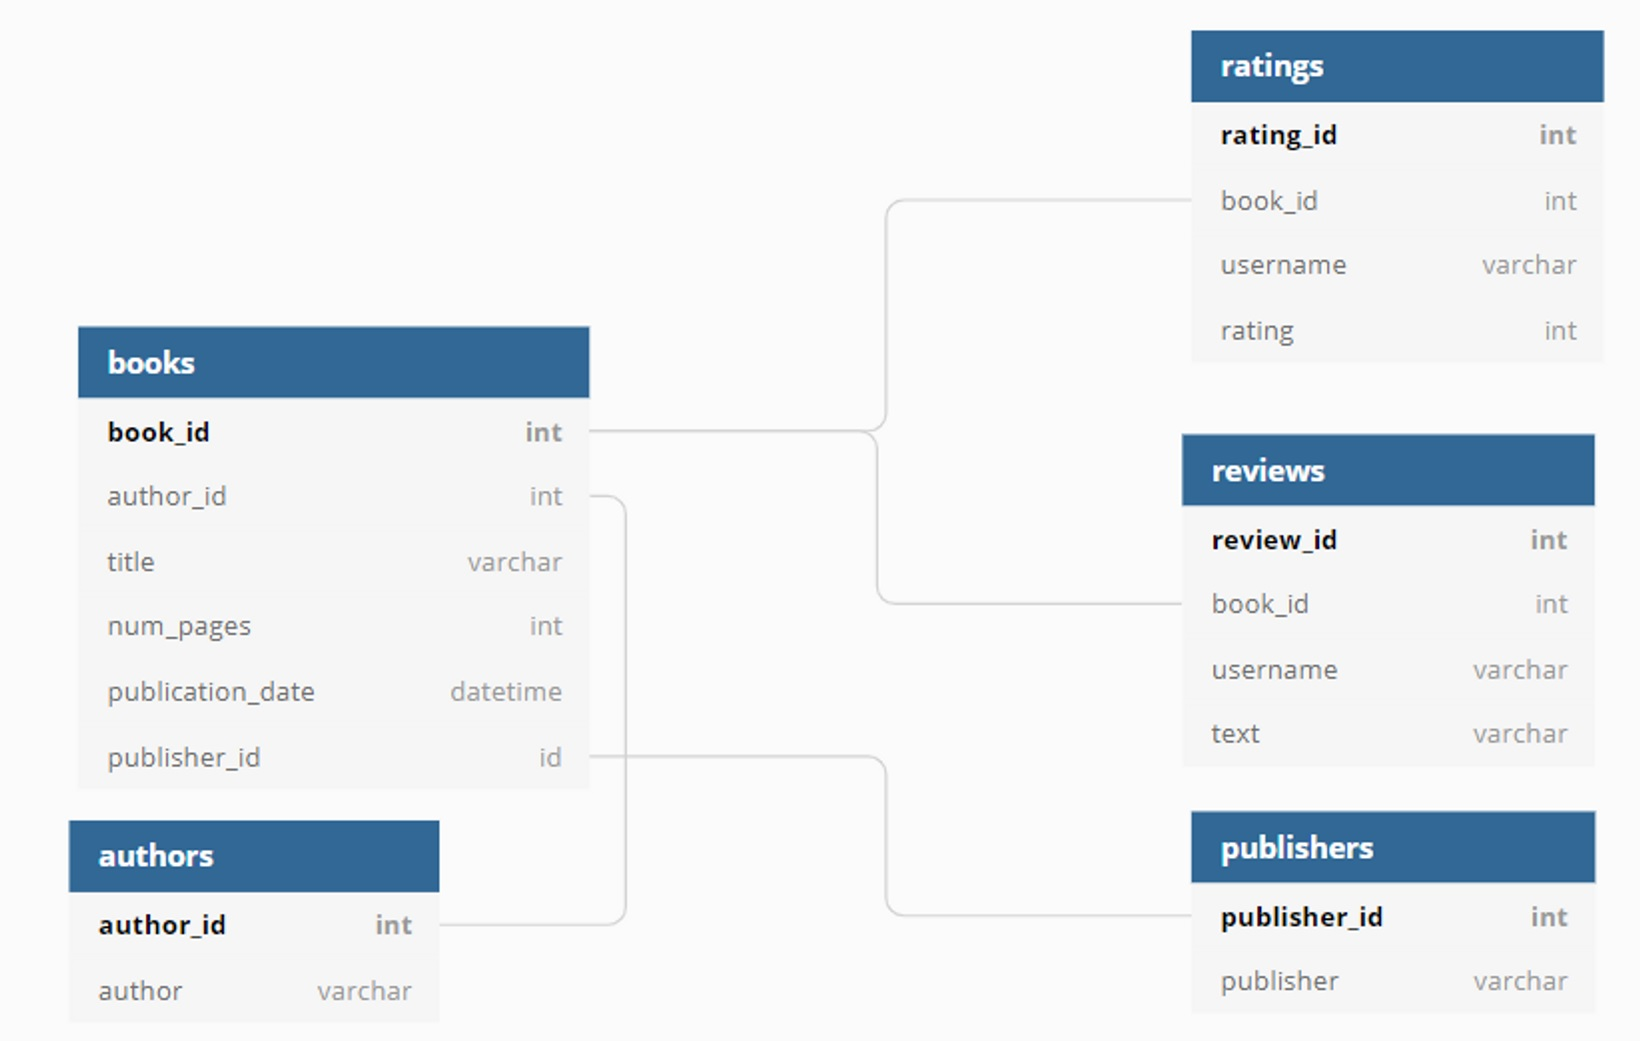

## Изучение предоставленных данных

Данные будем изучать с помощью SQL запроса. Импортируем необходимые библиотеки, загрузим и окнакомимся с предоставленными таблицами.

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import text, create_engine

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

### Таблица `books`

Выведем первые 5 строк таблицы.

In [3]:
# чтобы выполнить SQL-запрос, используем Pandas
query = '''SELECT * FROM books LIMIT 5'''

con=engine.connect()

pd.io.sql.read_sql(sql=text(query), con = con)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


Таблица `books`  
Содержит данные о книгах:  

•	`book_id` — идентификатор книги;  
•	`author_id` — идентификатор автора;  
•	`title` — название книги;  
•	`num_pages` — количество страниц;  
•	`publication_date` — дата публикации книги;  
•	`publisher_id` — идентификатор издателя.  

### Таблица `authors`

Выведем первые 5 строк таблицы.

In [4]:
query = '''SELECT * FROM authors LIMIT 5'''
con=engine.connect()

pd.io.sql.read_sql(sql=text(query), con = con)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


Таблица `authors`  
Содержит данные об авторах:  

•	`author_id` — идентификатор автора;  
•	`author` — имя автора.  

### Таблица `publishers`

Выведем первые 5 строк таблицы.

In [5]:
query = '''SELECT * FROM publishers LIMIT 5'''
con=engine.connect()

pd.io.sql.read_sql(sql=text(query), con = con)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


Таблица `publishers`
Содержит данные об издательствах:  

•	`publisher_id` — идентификатор издательства;    
•	`publisher` — название издательства;  

### Таблица `ratings`

Выведем первые 5 строк таблицы.

In [6]:
query = '''SELECT * FROM ratings LIMIT 5'''
con=engine.connect()

pd.io.sql.read_sql(sql=text(query), con = con)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


Таблица `ratings ` 
Содержит данные о пользовательских оценках книг:  
•	`rating_id` — идентификатор оценки;  
•	`book_id` — идентификатор книги;  
•	`username — имя пользователя, оставившего оценку;  
•	`rating` — оценка книги.  

### Таблица `reviews`

In [7]:
query = '''SELECT * FROM reviews LIMIT 5'''
con=engine.connect()

pd.io.sql.read_sql(sql=text(query), con = con)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


Таблица `reviews` 
Содержит данные о пользовательских обзорах на книги:  
•	`review_id` — идентификатор обзора;  
•	`book_id` — идентификатор книги;  
•	`username` — имя пользователя, написавшего обзор;  
•	`text` — текст обзора.  

## Анализ данных

### Количество книг, вышедших после 1 января 2000 года

In [9]:
query_1 = '''SELECT COUNT(title)
             FROM books
             WHERE publication_date > '2000-01-01'
             '''

con=engine.connect()

pd.io.sql.read_sql(sql=text(query_1), con = con)

,count
0,819


Количество книг, вышедших после 1 января 2000 года составляет 819 шт.

### Количество обзоров и средняя оценка для каждой книги

Для каждой книги посчитаем количество обзоров и среднюю оценку.

In [10]:
query_2 = '''SELECT b.book_id,
                    b.title, 
                    a.author, 
                    AVG(rt.rating) AS avg_rating, 
                    COUNT(DISTINCT(rw.review_id)) AS count_reviews
             FROM books AS b
             LEFT JOIN ratings AS rt ON b.book_id = rt.book_id
             LEFT JOIN reviews AS rw ON b.book_id = rw.book_id
             LEFT JOIN author AS a ON b.author_id = a.author_id
             GROUP BY b.book_id, b.title, a.author
             '''

con=engine.connect()

pd.io.sql.read_sql(sql=text(query_2), con = con)

,book_id,title,author,avg_rating,count_reviews
0,1,'Salem's Lot,Stephen King/Jerry N. Uelsmann,3.666667,2
1,2,1 000 Places to See Before You Die,Patricia Schultz,2.500000,1
2,3,13 Little Blue Envelopes (Little Blue Envelope...,Maureen Johnson,4.666667,3
3,4,1491: New Revelations of the Americas Before C...,Charles C. Mann,4.500000,2
4,5,1776,David McCullough,4.000000,4
...,...,...,...,...,...
995,996,Wyrd Sisters (Discworld #6; Witches #2),Terry Pratchett,3.666667,3
996,997,Xenocide (Ender's Saga #3),Orson Scott Card/Piotr W. Cholewa,3.400000,3
997,998,Year of Wonders,Geraldine Brooks,3.200000,4
998,999,You Suck (A Love Story #2),Christopher Moore,4.500000,2


Таблица книг со средним рейтингом и количеством публикация собрана.

### Издательства, которое выпустило наибольшее число книг толще 50 страниц

Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры

In [11]:
query_3 = '''SELECT p.publisher,
                    COUNT(b.book_id) AS count_books
             FROM books AS b
             INNER JOIN publishers AS p ON b.publisher_id = p.publisher_id
             WHERE b.num_pages > 50
             GROUP BY p.publisher
             ORDER BY count_books DESC
             LIMIT 1
             '''

con=engine.connect()

pd.io.sql.read_sql(sql=text(query_3), con = con)

,publisher,count_books
0,Penguin Books,42


Издательство Penguin Books выпустило наибольше количество (42 шт) книг толще 50 страницы.

### Автор с самой высокой средней оценкой книг

Определим автора с самой высокой средней оценкой книг— будем учитывать только книги с 50 и более оценками.

In [12]:
query_4 = '''
             SELECT a.author,
             AVG(rt.rating) AS avg_rating
             FROM books AS b
             INNER JOIN ratings AS rt ON b.book_id = rt.book_id
             INNER JOIN author AS a ON b.author_id = a.author_id
             WHERE b.book_id IN
                             (SELECT b.book_id
                             FROM books AS b
                             INNER JOIN ratings AS rt ON b.book_id = rt.book_id
                             GROUP BY b.book_id
                             HAVING COUNT(rt.rating) >= 50)
             GROUP BY a.author
             ORDER BY AVG(rt.rating) DESC
             LIMIT 1
             '''

con=engine.connect()

pd.io.sql.read_sql(sql=text(query_4), con = con)

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.287097


У автора J.K. Rowling/Mary GrandPré самые высокие средние оценки книг - около 4,3 (среди книг с 50 и более оценками).

### Среднее количество обзоров от пользователей, которые поставили больше 48 оценок

In [13]:
query_5 = ''' SELECT AVG(count_reviews)
              FROM 
                  (SELECT username,
                  COUNT(reviews) AS count_reviews
                  FROM reviews
                  GROUP BY username
                  HAVING username IN 
                                (SELECT username
                                 FROM ratings 
                                 GROUP BY username
                                 HAVING COUNT(rating) > 48))
                AS count_REW
             '''

con=engine.connect()

pd.io.sql.read_sql(sql=text(query_5), con = con)

,avg
0,24.0


Среднее количество обзоров от пользователей, которые поставили больше 48 оценок, составляет 24 шт.

## Выводы

Нам были предоставлены данные сервиса для чтения книг. Данные содержат информацию об авторах, названиях, количестве страниц, издательстве, дате выхода, оценках и отзывах.  

В рамках анализа мы ответили на поставленные вопросы.

• Количество книг, вышедших после 1 января 2000 года составляет 819 шт;  
• Создали таблицу, где для каждой книги посчитали количество обзоров и среднюю оценку;  
• Издательство Penguin Books выпустило наибольше количество (42 шт) книг толще 50 страницы;  
• У автора J.K. Rowling/Mary GrandPré самые высокие средние оценки книг (среди книг с 50 и более оценками);  
• Среднее количество обзоров от пользователей, которые поставили больше 48 оценок, составляет 24 шт.  

Стартапу стоит ориентироваться на книги с наивысшими оценками, выпускаемые самыми продуктивными издательствами (особенно Penguin Books). Также ориентироваться на высокооцениваемых авторов (в том числе J.K. Rowling/Mary GrandPré).